In [1]:
import networkx as nx
import bonesis
import clingo
from functools import reduce

This notebook has been executed using the docker image `colomoto/colomoto-docker:2021-02-01`

In [2]:
model = 'CaseStudy'
inputs = {'Carbon1', 'Carbon2', 'Oxygen'}
regulators = {'RPO2', 'RPcl'}

# computing graph layout...


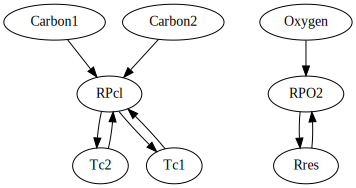

In [3]:
pkn = nx.DiGraph()
with open(f'./data/{model}/interactions.txt') as fp:
    for line in fp:
        line = line.strip()
        if not line:
            continue
        a, b = line.split()
        if b not in inputs:
            pkn.add_edge(a, b, sign=0)
        if a not in inputs:
            pkn.add_edge(b, a, sign=0)
pkn

In [4]:
bo = bonesis.BoNesis(bonesis.InfluenceGraph(pkn, allow_skipping_nodes=False))
# inputs are constants 0
for k in inputs:
    bo.custom(f"constant({clingo.String(k)}, -1)");

In [5]:
space = bo.local_functions().as_dict("count")
space

Grounding...done in 0.0s


{'Carbon1': 1,
 'RPcl': 2170,
 'Carbon2': 1,
 'Oxygen': 1,
 'RPO2': 14,
 'Rres': 4,
 'Tc2': 4,
 'Tc1': 4}

In [6]:
reduce(int.__mul__, space.values())

1944320